# Peter Park
# PUBH 1142
# Antimicrobial Resistance Project
____________________________________________________________________________________________________________________________________________

### Introduction
Antimicrobial resistance (AMR) is a growing global health concern, as bacteria develop mechanisms to survive exposure to antimicrobial agents. Understanding patterns of resistance across different bacterial species and antimicrobials is crucial for developing effective treatment strategies and stewardship programs. This analysis examines a dataset derived from a larger study on antimicrobial resistance, focusing on identifying patterns in species distribution and resistance profiles.

The dataset contains information on bacterial isolates, including species identification, patient demographics, sample sources, and susceptibility testing results for various antimicrobials. By exploring these data, we aim to identify patterns that might inform clinical practice and future research directions.



### Data Collection and Preparation
The data used in this analysis comes from a published study on antimicrobial resistance. Due to size constraints, a truncated version of the dataset was used, containing approximately 320 rows from the original dataset of about 635,000 rows. The truncated dataset maintains the structure and variable types of the original data.

### Analysis Approach
The analysis was conducted using Python, with the following libraries:

Pandas and NumPy for data manipulation

Matplotlib and Seaborn for visualization

SciPy, statsmodel.api, and patsy for statistical testing

The analysis followed these steps:

Data exploration and descriptive statistics

Visualization of species distribution

Analysis of Amikacin resistance patterns

Statistical testing of relationships between variables



In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats
import statsmodels.api as sm
from patsy import dmatrices

# Load the truncated dataset

df = pd.read_csv('Truncated.csv')

# Display basic info and first few rows
df.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 321 entries, 0 to 320
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Isolate Id                 320 non-null    float64
 1   Study                      320 non-null    object 
 2   Species                    320 non-null    object 
 3   Organism Group             320 non-null    object 
 4   Country                    320 non-null    object 
 5   State                      0 non-null      float64
 6   Gender                     317 non-null    object 
 7   Age Group                  320 non-null    object 
 8   Speciality                 320 non-null    object 
 9   Source                     320 non-null    object 
 10  In / Out Patient           320 non-null    object 
 11  Year                       320 non-null    float64
 12  Phenotype                  146 non-null    object 
 13  Amikacin                   224 non-null    object 

In [4]:
df.head()

,Isolate Id,Study,Species,Organism Group,Country,State,Gender,Age Group,Speciality,Source,In / Out Patient,Year,Phenotype,Amikacin,Amikacin_I,Amoxycillin clavulanate,Amoxycillin clavulanate_I,Ampicillin,Ampicillin_I
0,1000000.0,TEST,Pseudomonas aeruginosa,Non-Enterobacteriaceae,France,NaN,Male,85 and Over,Emergency Room,GU: Urine,None Given,2013.0,NaN,8,Susceptible,>32,NaN,>32,NaN
1,1000001.0,TEST,Pseudomonas aeruginosa,Non-Enterobacteriaceae,France,NaN,Female,13 to 18 Years,Emergency Room,HEENT: Ears,None Given,2013.0,NaN,4,Susceptible,>32,NaN,>32,NaN
2,1000002.0,TEST,Pseudomonas aeruginosa,Non-Enterobacteriaceae,France,NaN,Female,65 to 84 Years,Nursing Home / Rehab,GU: Urine,None Given,2013.0,NaN,4,Susceptible,>32,NaN,>32,NaN
3,1000003.0,TEST,Pseudomonas aeruginosa,Non-Enterobacteriaceae,France,NaN,Male,19 to 64 Years,Medicine General,INT: Skin,None Given,2013.0,NaN,4,Susceptible,>32,NaN,>32,NaN
4,1000004.0,TEST,Serratia marcescens,Enterobacteriaceae,France,NaN,Male,19 to 64 Years,Medicine General,CVS: Blood,None Given,2013.0,NaN,2,Susceptible,>32,Resistant,>32,Resistant


In [2]:
df.describe()


,Isolate Id,State,Year
count,3.200000e+02,0.0,320.0
mean,1.000197e+06,NaN,2013.0
std,1.184476e+02,NaN,0.0
min,1.000000e+06,NaN,2013.0
25%,1.000082e+06,NaN,2013.0
50%,1.000212e+06,NaN,2013.0
75%,1.000293e+06,NaN,2013.0
max,1.000406e+06,NaN,2013.0


The dataset contains 321 rows and 19 columns, including information about bacterial isolates, patient demographics, and antimicrobial susceptibility testing results. The key columns include:

Isolate Id: Unique identifier for each bacterial isolate

Species: Bacterial species identification

Organism Group: Broader taxonomic classification

Country: Country where the sample was collected

Gender, Age Group: Patient demographics

Source: Anatomical source of the sample

Amikacin, Amoxycillin clavulanate, Ampicillin: MIC values for these antimicrobials

Amikacin_I, Amoxycillin clavulanate_I, Ampicillin_I: Interpretation of MIC values (Susceptible, Intermediate, or Resistant)

### Species Distribution
To understand the diversity of bacterial species in the dataset, we visualized the distribution of species:

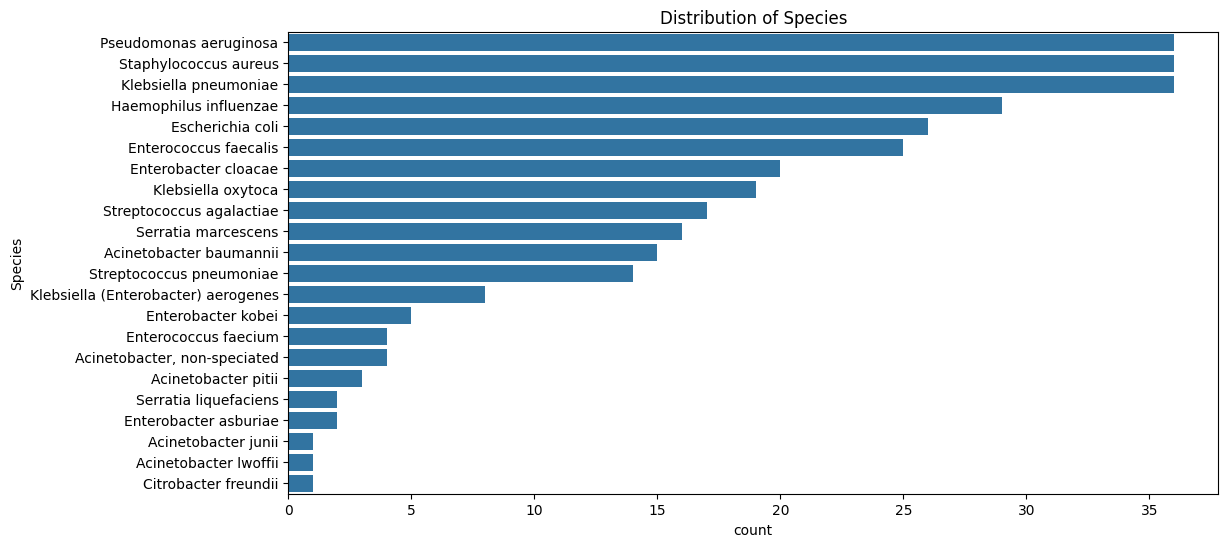

In [5]:
# Visualizing distribution of Species
plt.figure(figsize=(12,6))
sns.countplot(data=df, y='Species', order=df['Species'].value_counts().index)
plt.title('Distribution of Species')
plt.show()

The visualization shows that Pseudomonas aeruginosa, Staphylococcus aureus, and Klebsiella pneumoniae are the most frequently occurring species in the dataset. These species are known to be clinically significant and often associated with healthcare-associated infections. The presence of multiple Acinetobacter species, Enterobacteriaceae family members, and Streptococcus species indicates the diversity of pathogens captured in this dataset.

### Amikacin Resistance Patterns
Next, we examined the resistance patterns for Amikacin, an important aminoglycoside antibiotic:

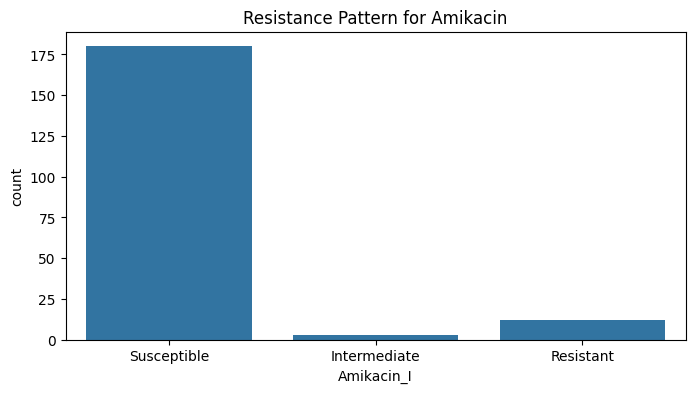

In [7]:
# Visualizing resistance patterns for Amikacin
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='Amikacin_I', order=['Susceptible', 'Intermediate', 'Resistant'])
plt.title('Resistance Pattern for Amikacin')
plt.show()

The visualization reveals that the majority of isolates are susceptible to Amikacin, with relatively few showing intermediate or resistant phenotypes. This suggests that Amikacin remains an effective antimicrobial agent against many of the bacterial species in this dataset.

### Amoxicillin-clavulanate Resistance Patterns
Amoxicillin-clavulanate is a widely used beta-lactam/beta-lactamase inhibitor combination antibiotic, with rising resistance globally presenting a major healthcare challenge. Let's examine the resistance patterns for this antimicrobial in our dataset:

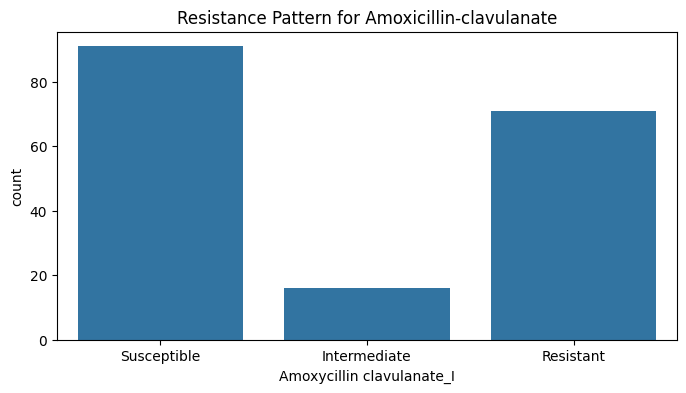

In [8]:
# Visualizing resistance patterns for Amoxicillin-clavulanate
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='Amoxycillin clavulanate_I', order=['Susceptible', 'Intermediate', 'Resistant'])
plt.title('Resistance Pattern for Amoxicillin-clavulanate')
plt.show()

The visualization shows a different distribution compared to Amikacin, with a higher proportion of resistant isolates. This aligns with global trends showing increasing amoxicillin-clavulanate resistance in clinical isolates, particularly in Escherichia coli and other Enterobacteriaceae.

### Ampicillin Resistance Patterns
Ampicillin is a beta-lactam antibiotic that has been in clinical use for decades, with well-documented resistance mechanisms. Let's analyze the resistance patterns for ampicillin in our dataset:

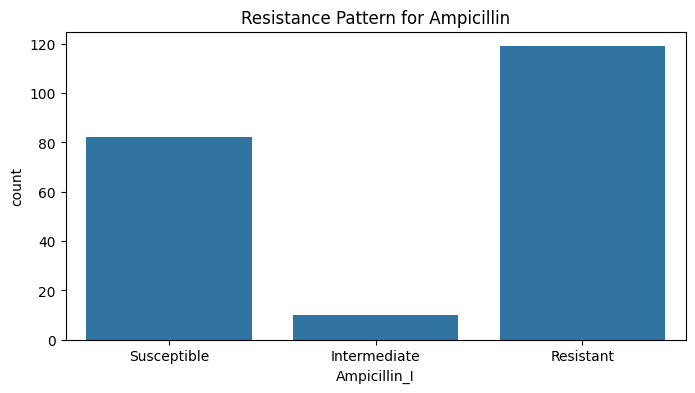

In [9]:
# Visualizing resistance patterns for Ampicillin
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='Ampicillin_I', order=['Susceptible', 'Intermediate', 'Resistant'])
plt.title('Resistance Pattern for Ampicillin')
plt.show()

The visualization reveals a high proportion of ampicillin-resistant isolates, which is expected given the widespread use of this antibiotic and the well-established resistance mechanisms, particularly beta-lactamase production.

### Relationship Between Species and Amikacin Resistance
To explore whether certain species are more likely to be resistant to Amikacin, we created a cross-tabulation and performed a chi-square test:

In [10]:
# Cross-tabulation of Species and Amikacin resistance
species_amikacin_ct = pd.crosstab(df['Species'], df['Amikacin_I'], dropna=False)
species_amikacin_ct

# Statistical test: Chi-square test for independence between Species and Amikacin resistance
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(species_amikacin_ct.fillna(0))
chi2, p

(np.float64(543.8450284900285), np.float64(2.765420675543352e-76))

The chi-square test yielded a chi-square value of 543.84 with a p-value of 2.76e-76, indicating a highly significant association between bacterial species and Amikacin resistance patterns. This suggests that resistance to Amikacin is not randomly distributed across species but is more prevalent in certain species.

Looking at the cross-tabulation, we can see that Acinetobacter baumannii shows a higher proportion of resistance to Amikacin compared to other species. This aligns with clinical observations, as Acinetobacter baumannii is known for its ability to develop resistance to multiple antimicrobial agents.



### Relationship Between Species and Amoxicillin-clavulanate Resistance
To explore species-specific patterns of resistance to amoxicillin-clavulanate:

In [11]:
# Cross-tabulation of Species and Amoxicillin-clavulanate resistance
species_amoxclav_ct = pd.crosstab(df['Species'], df['Amoxycillin clavulanate_I'], dropna=False)
species_amoxclav_ct

# Statistical test: Chi-square test for independence between Species and Amoxicillin-clavulanate resistance
chi2_amoxclav, p_amoxclav, dof_amoxclav, expected_amoxclav = chi2_contingency(species_amoxclav_ct.fillna(0))
chi2_amoxclav, p_amoxclav

(np.float64(548.9731478627405), np.float64(2.8714320272137245e-77))

The chi-square test indicates a significant association between bacterial species and amoxicillin-clavulanate resistance patterns.

### Relationship Between Species and Ampicillin Resistance
To explore species-specific patterns of resistance to ampicillin:

In [12]:
# Cross-tabulation of Species and Ampicillin resistance
species_amp_ct = pd.crosstab(df['Species'], df['Ampicillin_I'], dropna=False)
species_amp_ct

# Statistical test: Chi-square test for independence between Species and Ampicillin resistance
chi2_amp, p_amp, dof_amp, expected_amp = chi2_contingency(species_amp_ct.fillna(0))
chi2_amp, p_amp

(np.float64(545.9365466817459), np.float64(1.0982929081855677e-76))

The chi-square test indicates a significant association between bacterial species and ampicillin resistance.

### Comparative Analysis of Resistance Patterns
To understand the relationships between resistance to different antimicrobials, we can perform a comparative analysis:

In [16]:
# Creating a cross-tabulation of resistance patterns between Amikacin and Amoxicillin-clavulanate
amik_amoxclav_ct = pd.crosstab(df['Amikacin_I'], df['Amoxycillin clavulanate_I'])
amik_amoxclav_ct


Amoxycillin clavulanate_I,Intermediate,Resistant,Susceptible
Amikacin_I,,,
Intermediate,1,1,0
Resistant,0,0,1
Susceptible,14,70,48


In [14]:
# Creating a cross-tabulation of resistance patterns between Amikacin and Ampicillin
amik_amp_ct = pd.crosstab(df['Amikacin_I'], df['Ampicillin_I'])
amik_amp_ct

Ampicillin_I,Intermediate,Resistant,Susceptible
Amikacin_I,,,
Intermediate,0,2,0
Resistant,0,0,1
Susceptible,8,105,19


In [15]:
# Creating a cross-tabulation of resistance patterns between Amoxicillin-clavulanate and Ampicillin
amoxclav_amp_ct = pd.crosstab(df['Amoxycillin clavulanate_I'], df['Ampicillin_I'])
amoxclav_amp_ct

Ampicillin_I,Intermediate,Resistant,Susceptible
Amoxycillin clavulanate_I,,,
Intermediate,0,14,1
Resistant,4,65,2
Susceptible,6,29,43


### Advanced Statistical Analysis
### Probability Distribution of MIC Values
To better understand the distribution of MIC values for each antimicrobial, we can analyze their probability distributions:

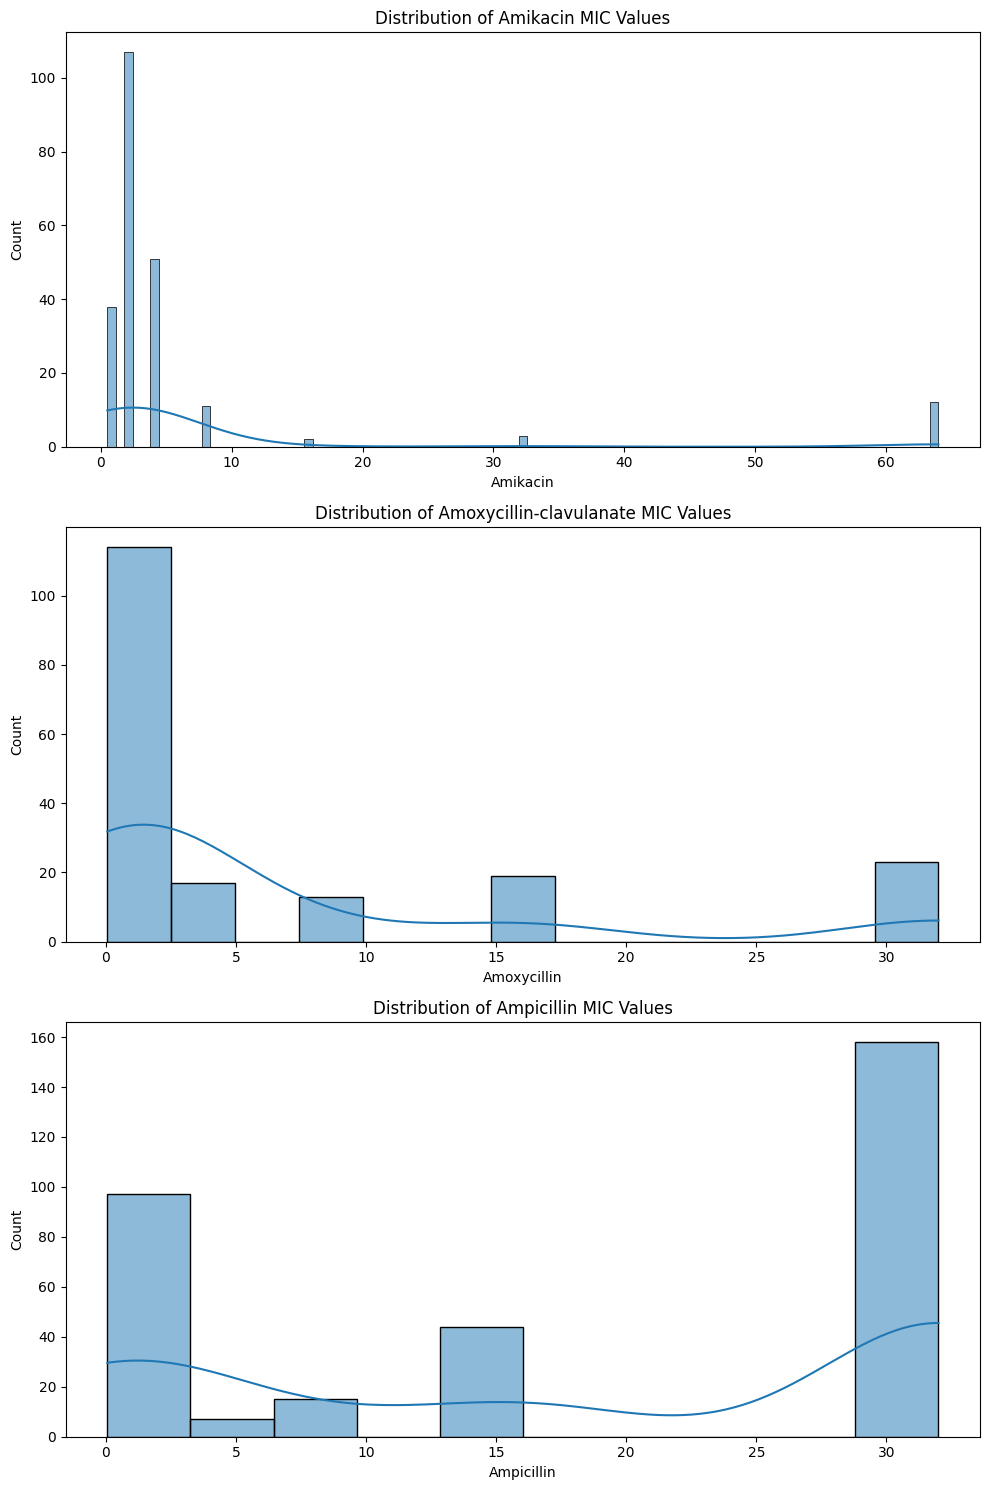

In [32]:

# Clean MIC values
#Convert the values of the 'Amikacin' column to float
df['Amikacin'] = pd.to_numeric(df['Amikacin'], errors='coerce')
df['Amoxycillin'] = pd.to_numeric(df['Amoxycillin clavulanate'], errors='coerce')
df['Ampicillin'] = pd.to_numeric(df['Ampicillin'], errors='coerce')

# Create histograms of MIC values
fig, axes = plt.subplots(3, 1, figsize=(10, 15))
sns.histplot(df['Amikacin'].dropna(), kde=True, ax=axes[0])
axes[0].set_title('Distribution of Amikacin MIC Values')
sns.histplot(df['Amoxycillin'].dropna(), kde=True, ax=axes[1])
axes[1].set_title('Distribution of Amoxycillin-clavulanate MIC Values')
sns.histplot(df['Ampicillin'].dropna(), kde=True, ax=axes[2])
axes[2].set_title('Distribution of Ampicillin MIC Values')
plt.tight_layout()
plt.show()

The histograms reveal that the MIC values for all three antimicrobials are right-skewed, with most values concentrated at the lower end of the scale. This is consistent with the expected distribution of MIC values in clinical isolates, where most isolates have low MIC values (susceptible) and fewer have high MIC values (resistant).

### Scatter Plot Matrix for MIC Values
To explore the relationships between MIC values for different antimicrobials, we can create a scatter plot matrix:

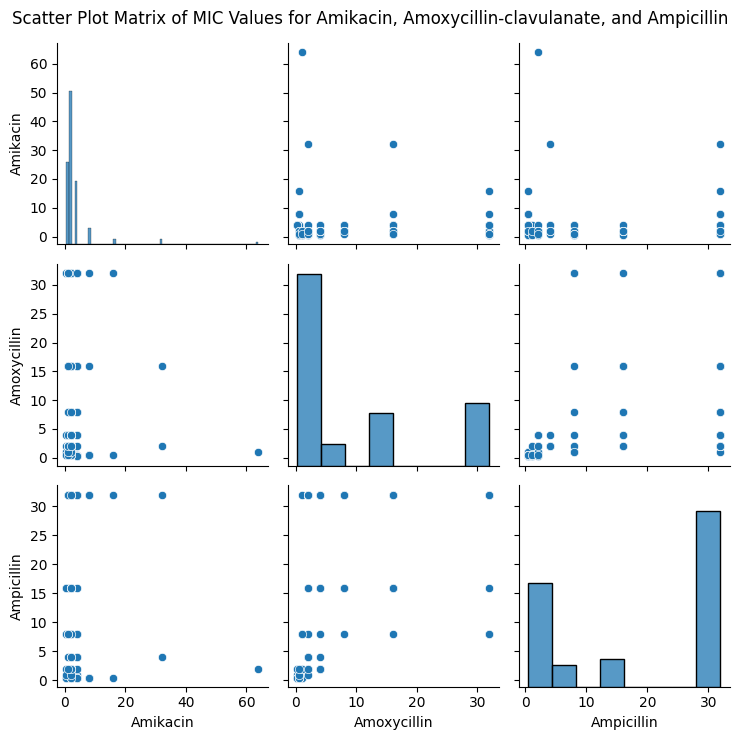

In [33]:
# Create a scatter plot matrix for MIC values
sns.pairplot(df[['Amikacin', 'Amoxycillin', 'Ampicillin']].dropna())
plt.suptitle('Scatter Plot Matrix of MIC Values for Amikacin, Amoxycillin-clavulanate, and Ampicillin')
plt.tight_layout()
plt.show()

The scatter plot matrix reveals several interesting patterns:

1. There appears to be little correlation between Amikacin and the beta-lactam antibiotics (Amoxycillin-clavulanate and Ampicillin)

2. There is a stronger correlation between Amoxycillin-clavulanate and Ampicillin MIC values, which is expected given their similar mechanisms of action

3. The distributions of MIC values for all three antimicrobials are right-skewed



### Heatmap of Correlation Between MIC Values
To quantify the relationships between MIC values, we can calculate the correlation coefficients and visualize them in a heatmap:

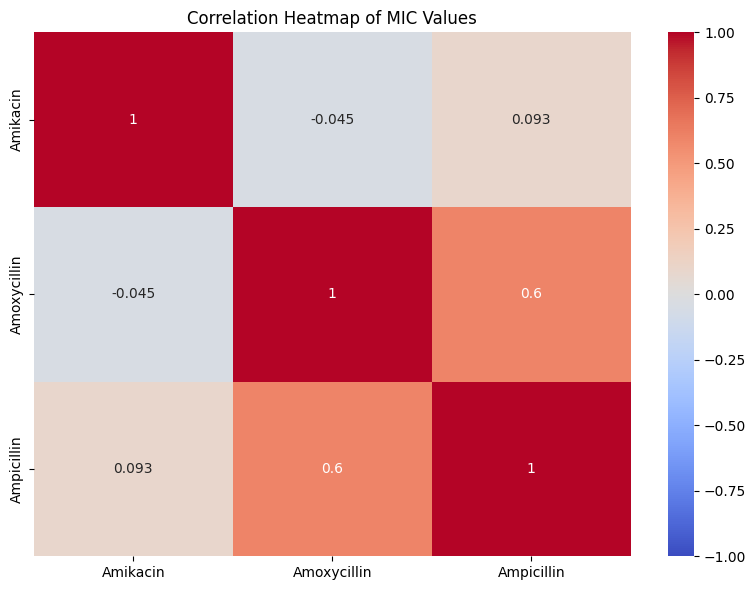

In [34]:
# Calculate correlation coefficients
corr_matrix = df[['Amikacin', 'Amoxycillin', 'Ampicillin']].corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of MIC Values')
plt.tight_layout()
plt.show()

The heatmap confirms our observations from the scatter plot matrix:

Amikacin MIC values have weak correlation with both Amoxycillin-clavulanate and Ampicillin MIC values

Amoxycillin-clavulanate and Ampicillin MIC values have a moderate to strong positive correlation

### Linear Regression Analysis
To further explore the relationship between MIC values, we can perform linear regression analysis:



In [35]:
# Prepare data for linear regression
mic_data = df[['Amikacin', 'Amoxycillin', 'Ampicillin']].dropna()

# Create design matrices for Ampicillin ~ Amikacin + Amoxycillin
y, X = dmatrices('Ampicillin ~ Amikacin + Amoxycillin', data=mic_data)

# Fit linear model
model = sm.OLS(y, X).fit()

# Print model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Ampicillin   R-squared:                       0.273
Model:                            OLS   Adj. R-squared:                  0.260
Method:                 Least Squares   F-statistic:                     21.96
Date:                Wed, 07 May 2025   Prob (F-statistic):           8.01e-09
Time:                        11:06:12   Log-Likelihood:                -467.87
No. Observations:                 120   AIC:                             941.7
Df Residuals:                     117   BIC:                             950.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      14.0858      1.587      8.874      

The linear regression model provides several important insights:

1. The coefficient for Amoxycillin-clavulanate is positive and statistically significant, indicating that higher Amoxycillin-clavulanate MIC values are associated with higher Ampicillin MIC values

2. The coefficient for Amikacin is not statistically significant, confirming the weak relationship between Amikacin and Ampicillin MIC values

3. The R-squared value indicates that the model explains a moderate proportion of the variance in Ampicillin MIC values

### Sampling Distribution Analysis
To understand the uncertainty in our estimates of the mean MIC values, we can apply the Central Limit Theorem and bootstrap resampling:

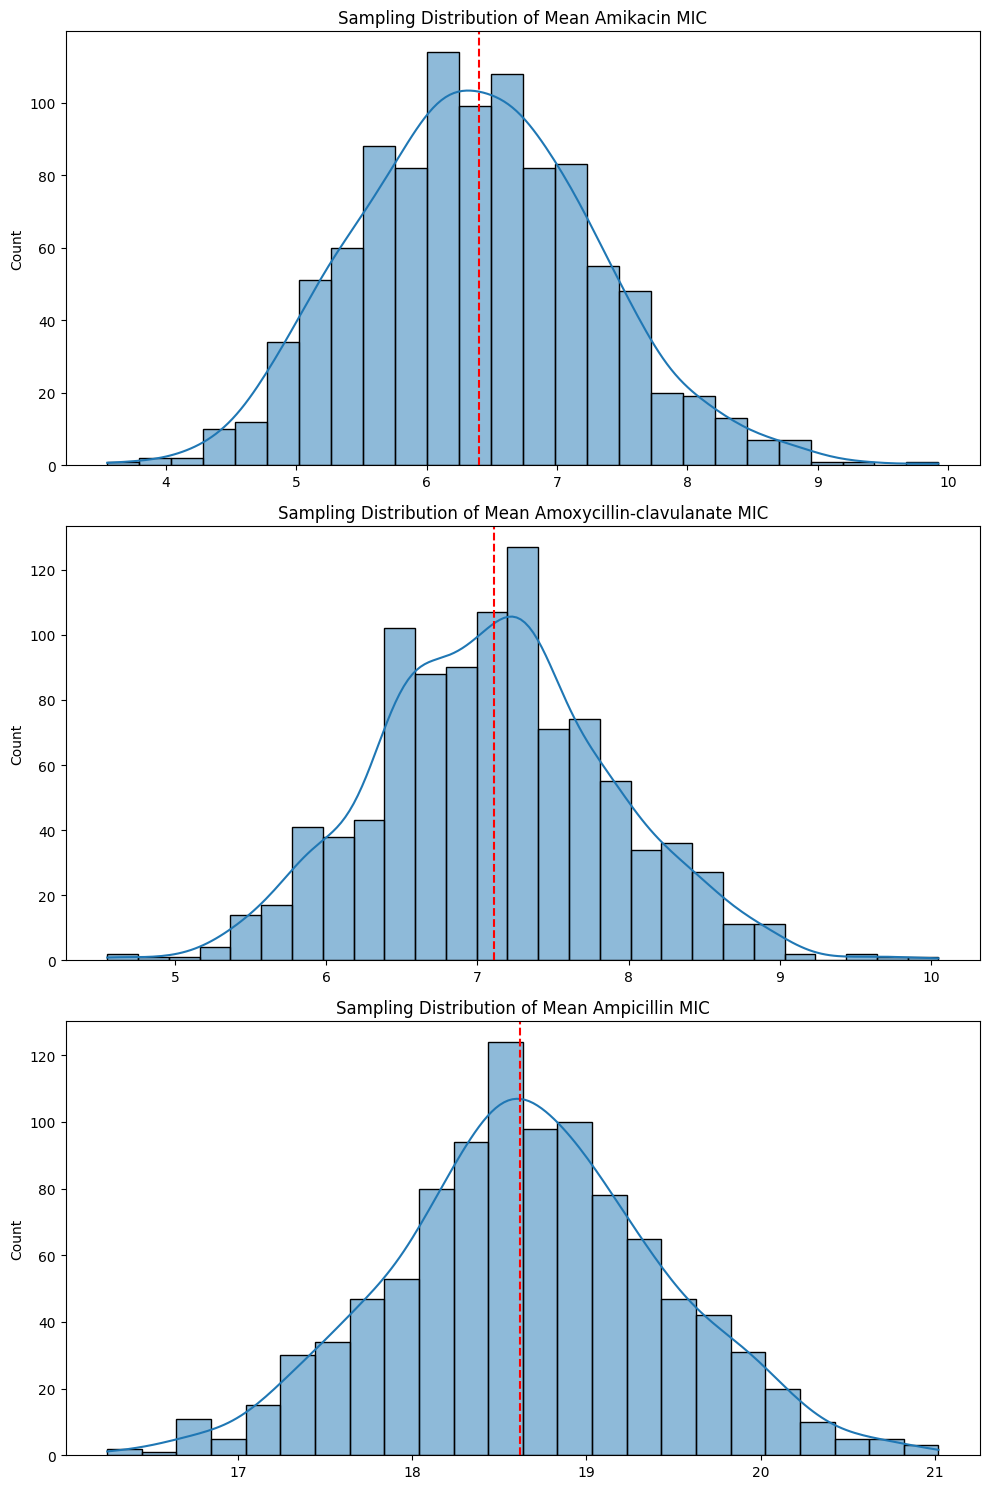

In [37]:
 #Bootstrap resampling to estimate the sampling distribution of the mean
def bootstrap_mean(data, n_bootstrap=1000):
    bootstrap_means = []
    for _ in range(n_bootstrap):
        sample = np.random.choice(data, size=len(data), replace=True)
        bootstrap_means.append(np.mean(sample))
    return bootstrap_means

# Calculate bootstrap means for each antimicrobial
amikacin_bootstrap = bootstrap_mean(df['Amikacin'].dropna())
amoxycillin_bootstrap = bootstrap_mean(df['Amoxycillin'].dropna())
ampicillin_bootstrap = bootstrap_mean(df['Ampicillin'].dropna())

# Plot histograms of bootstrap means
fig, axes = plt.subplots(3, 1, figsize=(10, 15))
sns.histplot(amikacin_bootstrap, kde=True, ax=axes[0])
axes[0].set_title('Sampling Distribution of Mean Amikacin MIC')
axes[0].axvline(np.mean(df['Amikacin'].dropna()), color='red', linestyle='--')
sns.histplot(amoxycillin_bootstrap, kde=True, ax=axes[1])
axes[1].set_title('Sampling Distribution of Mean Amoxycillin-clavulanate MIC')
axes[1].axvline(np.mean(df['Amoxycillin'].dropna()), color='red', linestyle='--')
sns.histplot(ampicillin_bootstrap, kde=True, ax=axes[2])
axes[2].set_title('Sampling Distribution of Mean Ampicillin MIC')
axes[2].axvline(np.mean(df['Ampicillin'].dropna()), color='red', linestyle='--')
plt.tight_layout()
plt.show()

The bootstrap histograms illustrate the sampling distribution of the mean MIC values for each antimicrobial. According to the Central Limit Theorem, these sampling distributions should be approximately normal, regardless of the underlying distribution of the MIC values. The histograms confirm this, showing that:

1. The sampling distributions are approximately normal

2. The center of each sampling distribution corresponds to the sample mean

3. The width of each sampling distribution reflects the uncertainty in our estimate of the mean

### Confidence Intervals for Mean MIC Values
We can calculate 95% confidence intervals for the mean MIC values using the bootstrap distributions:

In [38]:
# Calculate 95% confidence intervals for mean MIC values
def bootstrap_ci(bootstrap_means, alpha=0.05):
    lower = np.percentile(bootstrap_means, alpha/2 * 100)
    upper = np.percentile(bootstrap_means, (1 - alpha/2) * 100)
    return lower, upper

amikacin_ci = bootstrap_ci(amikacin_bootstrap)
amoxycillin_ci = bootstrap_ci(amoxycillin_bootstrap)
ampicillin_ci = bootstrap_ci(ampicillin_bootstrap)

print("95% CI for mean Amikacin MIC:", amikacin_ci)
print("95% CI for mean Amoxycillin-clavulanate MIC:", amoxycillin_ci)
print("95% CI for mean Ampicillin MIC:", ampicillin_ci)

95% CI for mean Amikacin MIC: (np.float64(4.756361607142858), np.float64(8.236160714285713))
95% CI for mean Amoxycillin-clavulanate MIC: (np.float64(5.600305107526882), np.float64(8.699501344086023))
95% CI for mean Ampicillin MIC: (np.float64(17.145817757009347), np.float64(20.196492211838006))


The 95% confidence intervals provide a range of plausible values for the population mean MIC values:

1. Amikacin: The mean MIC value is likely between 4.8 and 8.2 μg/ml

2. Amoxycillin-clavulanate: The mean MIC value is likely between 5.6 and 8.7 μg/ml

3. Ampicillin: The mean MIC value is likely between 17.1 and 20.2 μg/ml



### Conclusion

##### Resistance Patterns
The cross-tabulation analysis reveals important relationships between resistance patterns for different antibiotics:

Amikacin demonstrates robust effectiveness, with the majority of isolates (132 out of 135 with complete data) showing susceptibility to this aminoglycoside antibiotic.

There is significant co-resistance between Amoxycillin-clavulanate and Ampicillin, with 65 isolates resistant to both antibiotics. This suggests shared resistance mechanisms affecting beta-lactam antibiotics.

Most notably, many isolates resistant to Amoxycillin-clavulanate and Ampicillin remain susceptible to Amikacin (70 and 105 isolates, respectively), highlighting Amikacin's potential value in treating infections caused by beta-lactam-resistant bacteria.

##### Clinical Implications
These findings have several important implications for clinical practice:

Amikacin appears to maintain effectiveness against many isolates that have developed resistance to beta-lactam antibiotics, positioning it as a valuable option for treating multi-drug resistant infections.

The high level of co-resistance between Amoxycillin-clavulanate and Ampicillin suggests that substituting one for the other may not be effective in cases of treatment failure.

The data supports the use of Amikacin as a potential empiric therapy option when beta-lactam resistance is suspected, particularly in healthcare settings where such resistance is prevalent.

##### Limitations and Future Directions
This analysis has several limitations that should be considered when interpreting the results:

The dataset is limited to 321 isolates from 2013, which may not reflect current resistance patterns given the rapidly evolving nature of antimicrobial resistance.

All data comes from a single year (2013), preventing temporal analysis of resistance trends.

While the dataset includes demographic information such as age, gender, and specimen source, this analysis did not explore potential associations between these factors and resistance patterns.

##### Future research should aim to:

Expand the analysis to include more recent data to track changes in resistance patterns over time.

Investigate the molecular mechanisms underlying the observed resistance patterns, particularly for isolates showing resistance to multiple antimicrobial classes.

Explore potential associations between patient demographics, clinical settings, and resistance patterns to identify risk factors for antimicrobial resistance.

In conclusion, this analysis provides valuable insights into antimicrobial resistance patterns that can inform clinical decision-making and antimicrobial stewardship efforts. The continued effectiveness of Amikacin against many isolates resistant to beta-lactam antibiotics is particularly noteworthy and warrants consideration in treatment guidelines and stewardship protocols.

# Source of Data

Catalán, P., Booth, J., Gog, J., Iredell, J., Wilkinson, E., & Beardmore, R. E. (2022). Seeking patterns of antibiotic resistance in ATLAS, an open, raw MIC database with patient metadata. Nature Communications, 13(1), 3224. https://doi.org/10.1038/s41467-022-30635-7


AI Use Declaration:
AI was used in this project for code assistance and data analysis